In [5]:
import pandas as pd

df = pd.read_csv('/content/population.csv')

In [6]:
df.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,2.741996,2.769515,2.792110,2.811906,2.828133,2.850383,2.867694,2.861356,2.826982,...,2.385159,2.449255,2.469810,2.424469,2.335303,2.242795,2.152384,2.088283,2.050000,2.029991
1,Caribbean small states,1.911755,1.931196,1.893275,1.771980,1.605163,1.448561,1.298573,1.196177,1.164617,...,0.607070,0.633955,0.649817,0.649227,0.636539,0.614597,0.585947,0.557091,0.531885,0.514897
2,Central Europe and the Baltics,0.914136,0.843231,0.893254,0.934352,0.764829,0.735036,0.930801,0.864361,0.735317,...,-0.240341,-0.466785,-0.358132,-0.192448,-0.362710,-0.353692,-0.229155,-0.213202,-0.209757,-0.171544
3,Early-demographic dividend,2.378681,2.399318,2.411945,2.425629,2.435707,2.442855,2.455314,2.457393,2.465558,...,1.596281,1.576339,1.557348,1.538742,1.528734,1.507963,1.476112,1.457399,1.438927,1.419336
4,East Asia & Pacific,0.317912,1.356230,2.403411,2.313426,2.356414,2.604640,2.458242,2.434869,2.665623,...,0.726182,0.687229,0.689983,0.667171,0.658738,0.657531,0.668169,0.670721,0.673393,0.667919


In [19]:
df1 = df.drop(columns = ['Country Name'])

In [20]:
df1[df1.isnull()] = df1[df1.isnull()].fillna(df1.mean())

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

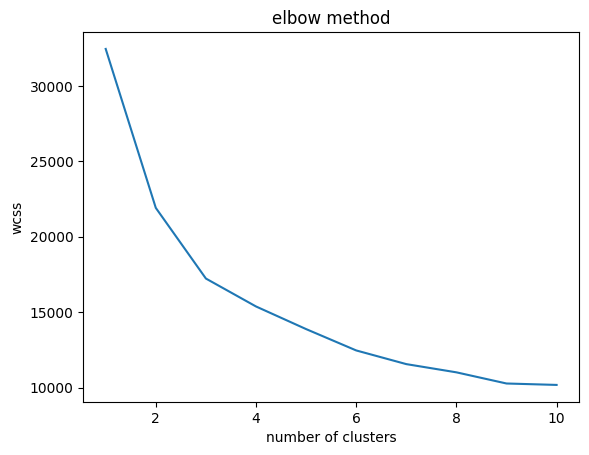

In [25]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
pip install kneed

In [40]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss,curve='convex',direction = 'decreasing')
kl.elbow

3

In [41]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++')
clusters = kmeans.fit_predict(df1)
df1['clusters'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
df1.clusters.value_counts()

clusters
0    143
1    109
2      3
Name: count, dtype: int64

In [37]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(df1)
  score = silhouette_score(df1,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [38]:
silhouette_coefficients

[0.34873781533146925,
 0.3661477160568738,
 0.24870564895536904,
 0.266278635424046,
 0.24708959934548885,
 0.2011284632311887,
 0.19767961969579775,
 0.20834291031666816,
 0.20473568076007984]

In [43]:
silhouette_avg = silhouette_score(df1, clusters)

In [44]:
silhouette_avg

0.3664795543009484

In [46]:
cluster_centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(cluster_centroids)
print("Cluster centroids:")
print(centroids_df)

Cluster centroids:
         0          1          2          3         4         5         6   \
0  2.570152   2.592294   2.610547   2.642592  2.666208  2.703759  2.734665   
1  1.590544   1.661555   1.667385   1.615592  1.537381  1.435273  1.378793   
2  9.538881  10.815023  11.069074  10.391015  9.372926  8.372110  7.845994   

         7         8         9   ...         46         47         48  \
0  2.725906  2.726038  2.730428  ...   2.078526   2.066922   2.013749   
1  1.304204  1.263876  1.176740  ...   0.492523   0.502408   0.467712   
2  7.993457  8.830759  9.863831  ...  12.903319  12.187626  10.309867   

         49        50        51        52        53        54            55  
0  2.025304  2.048802  2.003692  1.969114  1.929706  1.887712  9.650350e-01  
1  0.426236  0.378303  0.383641  0.456410  0.408744  0.422092 -1.110223e-15  
2  8.062598  6.028542  4.501545  3.366737  2.720989  2.428373  1.000000e+00  

[3 rows x 56 columns]
